In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 

In [4]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 17s 357ms/step - loss: 3.0404 - accuracy: 0.4254 - val_loss: 2.4971 - val_accuracy: 0.5200
Epoch 2/100
40/40 [==============================] - 14s 339ms/step - loss: 2.4990 - accuracy: 0.4921 - val_loss: 2.3644 - val_accuracy: 0.5296
Epoch 3/100
40/40 [==============================] - 15s 372ms/step - loss: 2.2383 - accuracy: 0.5264 - val_loss: 2.2706 - val_accuracy: 0.5344
Epoch 4/100
40/40 [==============================] - 15s 386ms/step - loss: 2.2008 - accuracy: 0.5088 - val_loss: 2.1429 - val_accuracy: 0.5344
Epoch 5/100
40/40 [==============================] - 13s 336ms/step - loss: 2.0283 - accuracy: 0.5276 - val_loss: 2.0117 - val_accuracy: 0.5408
Epoch 6/100
40/40 [==============================] - 14s 354ms/step - loss: 1.9474 - accuracy: 0.5405 - val_loss: 1.9344 - val_accuracy: 0.5520
Epoch 7/100
40/40 [==============================] - 13s 324ms/step - loss: 1.8629 - accuracy: 0.5411 - val_loss: 1.9506 - val_accuracy:

40/40 [==============================] - 13s 332ms/step - loss: 0.4254 - accuracy: 0.8956 - val_loss: 1.1321 - val_accuracy: 0.6912
Epoch 58/100
40/40 [==============================] - 13s 332ms/step - loss: 0.3818 - accuracy: 0.9203 - val_loss: 1.1300 - val_accuracy: 0.6960
Epoch 59/100
40/40 [==============================] - 14s 340ms/step - loss: 0.3579 - accuracy: 0.9233 - val_loss: 1.0906 - val_accuracy: 0.7056
Epoch 60/100
40/40 [==============================] - 13s 331ms/step - loss: 0.3248 - accuracy: 0.9297 - val_loss: 1.1210 - val_accuracy: 0.6960
Epoch 61/100
40/40 [==============================] - 14s 351ms/step - loss: 0.3181 - accuracy: 0.9414 - val_loss: 1.1113 - val_accuracy: 0.7040
Epoch 62/100
40/40 [==============================] - 13s 315ms/step - loss: 0.3097 - accuracy: 0.9370 - val_loss: 1.1216 - val_accuracy: 0.6960
Epoch 63/100
40/40 [==============================] - 13s 330ms/step - loss: 0.3068 - accuracy: 0.9351 - val_loss: 1.1055 - val_accuracy: 0.697

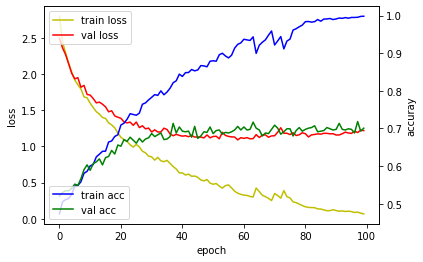

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_lstm_v4.csv', index=False)

In [7]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()

model.add(Conv1D (kernel_size=3, filters=128, strides=1, padding='valid',
                    kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 26s 336ms/step - loss: 3.0154 - accuracy: 0.4276 - val_loss: 2.5388 - val_accuracy: 0.5232
Epoch 2/100
40/40 [==============================] - 9s 233ms/step - loss: 2.5331 - accuracy: 0.5105 - val_loss: 2.4293 - val_accuracy: 0.5296
Epoch 3/100
40/40 [==============================] - 10s 245ms/step - loss: 2.4420 - accuracy: 0.5034 - val_loss: 2.3930 - val_accuracy: 0.5296
Epoch 4/100
40/40 [==============================] - 10s 238ms/step - loss: 2.3988 - accuracy: 0.5065 - val_loss: 2.3295 - val_accuracy: 0.5328
Epoch 5/100
40/40 [==============================] - 9s 216ms/step - loss: 2.3247 - accuracy: 0.5119 - val_loss: 2.2709 - val_accuracy: 0.5312
Epoch 6/100
40/40 [==============================] - 9s 226ms/step - loss: 2.2760 - accuracy: 0.5190 - val_loss: 2.2225 - val_accuracy: 0.5344
Epoch 7/100
40/40 [==============================] - 9s 235ms/step - loss: 2.1791 - accuracy: 0.5293 - val_loss: 2.2301 - val_accuracy: 0.5

Epoch 58/100
40/40 [==============================] - 8s 211ms/step - loss: 1.0155 - accuracy: 0.7491 - val_loss: 1.4344 - val_accuracy: 0.6464
Epoch 59/100
40/40 [==============================] - 9s 221ms/step - loss: 0.9909 - accuracy: 0.7378 - val_loss: 1.4211 - val_accuracy: 0.6432
Epoch 60/100
40/40 [==============================] - 9s 214ms/step - loss: 0.9623 - accuracy: 0.7382 - val_loss: 1.3944 - val_accuracy: 0.6464
Epoch 61/100
40/40 [==============================] - 9s 220ms/step - loss: 0.9405 - accuracy: 0.7618 - val_loss: 1.3899 - val_accuracy: 0.6480
Epoch 62/100
40/40 [==============================] - 9s 219ms/step - loss: 0.8675 - accuracy: 0.7607 - val_loss: 1.3727 - val_accuracy: 0.6496
Epoch 63/100
40/40 [==============================] - 9s 235ms/step - loss: 0.8865 - accuracy: 0.7551 - val_loss: 1.3738 - val_accuracy: 0.6528
Epoch 64/100
40/40 [==============================] - 9s 215ms/step - loss: 0.8224 - accuracy: 0.7796 - val_loss: 1.3584 - val_accuracy:

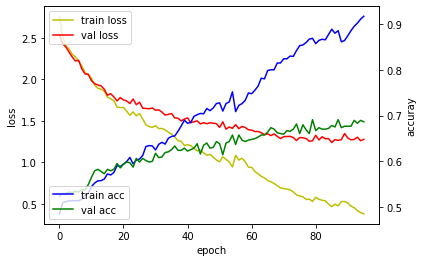

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [12]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 29s 354ms/step - loss: 2.9461 - accuracy: 0.4396 - val_loss: 2.6127 - val_accuracy: 0.5232
Epoch 2/100
40/40 [==============================] - 11s 280ms/step - loss: 2.6329 - accuracy: 0.5061 - val_loss: 2.5617 - val_accuracy: 0.5232
Epoch 3/100
40/40 [==============================] - 12s 303ms/step - loss: 2.4487 - accuracy: 0.5333 - val_loss: 2.4983 - val_accuracy: 0.5232
Epoch 4/100
40/40 [==============================] - 11s 271ms/step - loss: 2.5001 - accuracy: 0.5043 - val_loss: 2.4082 - val_accuracy: 0.5296
Epoch 5/100
40/40 [==============================] - 11s 275ms/step - loss: 2.3924 - accuracy: 0.5172 - val_loss: 2.3075 - val_accuracy: 0.5328
Epoch 6/100
40/40 [==============================] - 12s 290ms/step - loss: 2.2916 - accuracy: 0.5152 - val_loss: 2.2492 - val_accuracy: 0.5264
Epoch 7/100
40/40 [==============================] - 12s 305ms/step - loss: 2.2490 - accuracy: 0.4963 - val_loss: 2.1702 - val_accuracy:

40/40 [==============================] - 11s 289ms/step - loss: 0.0327 - accuracy: 0.9999 - val_loss: 1.0422 - val_accuracy: 0.7392
Epoch 58/100
40/40 [==============================] - 12s 293ms/step - loss: 0.0332 - accuracy: 0.9997 - val_loss: 1.0253 - val_accuracy: 0.7456
Epoch 59/100
40/40 [==============================] - 12s 295ms/step - loss: 0.0309 - accuracy: 0.9990 - val_loss: 1.0514 - val_accuracy: 0.7488
Epoch 60/100
40/40 [==============================] - 12s 307ms/step - loss: 0.0270 - accuracy: 0.9999 - val_loss: 1.0407 - val_accuracy: 0.7456
Epoch 61/100
40/40 [==============================] - 12s 291ms/step - loss: 0.0264 - accuracy: 0.9998 - val_loss: 1.0573 - val_accuracy: 0.7472
Epoch 62/100
40/40 [==============================] - 12s 304ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 1.0641 - val_accuracy: 0.7440
Epoch 63/100
40/40 [==============================] - 12s 309ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.0635 - val_accuracy: 0.744

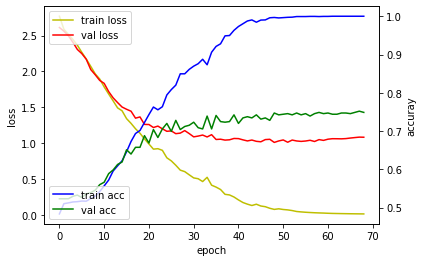

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [14]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_lstm_v4.csv', index=False)